# Task 5.3. Binarisation with moving average 4.1 - 4.4
---
***Author: Piotr Skalski***

## Imports

In [1]:
import numpy as np
import cv2
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [2]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "tekstReczny.png"

## Loading image

In [3]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

## Display the histogram

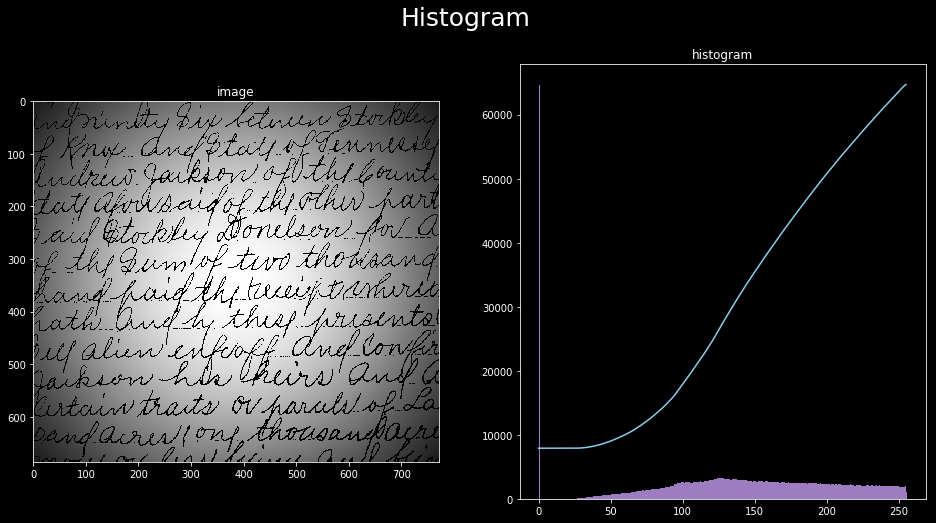

In [4]:
# creation of a cumulative histogram
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

## Thresholding Binarization

### Settings

In [8]:
THRESHOLD = 80
THRESH_TYPES = [
    cv2.THRESH_BINARY,
    cv2.THRESH_BINARY_INV,
    cv2.THRESH_TRUNC,
    cv2.THRESH_TOZERO,
    cv2.THRESH_TOZERO_INV,
]
THRESH_NAMES = [
    "THRESH_BINARY",
    "THRESH_BINARY_INV",
    "THRESH_TRUNC",
    "THRESH_TOZERO",
    "THRESH_TOZERO_INV",
]

### Implementation

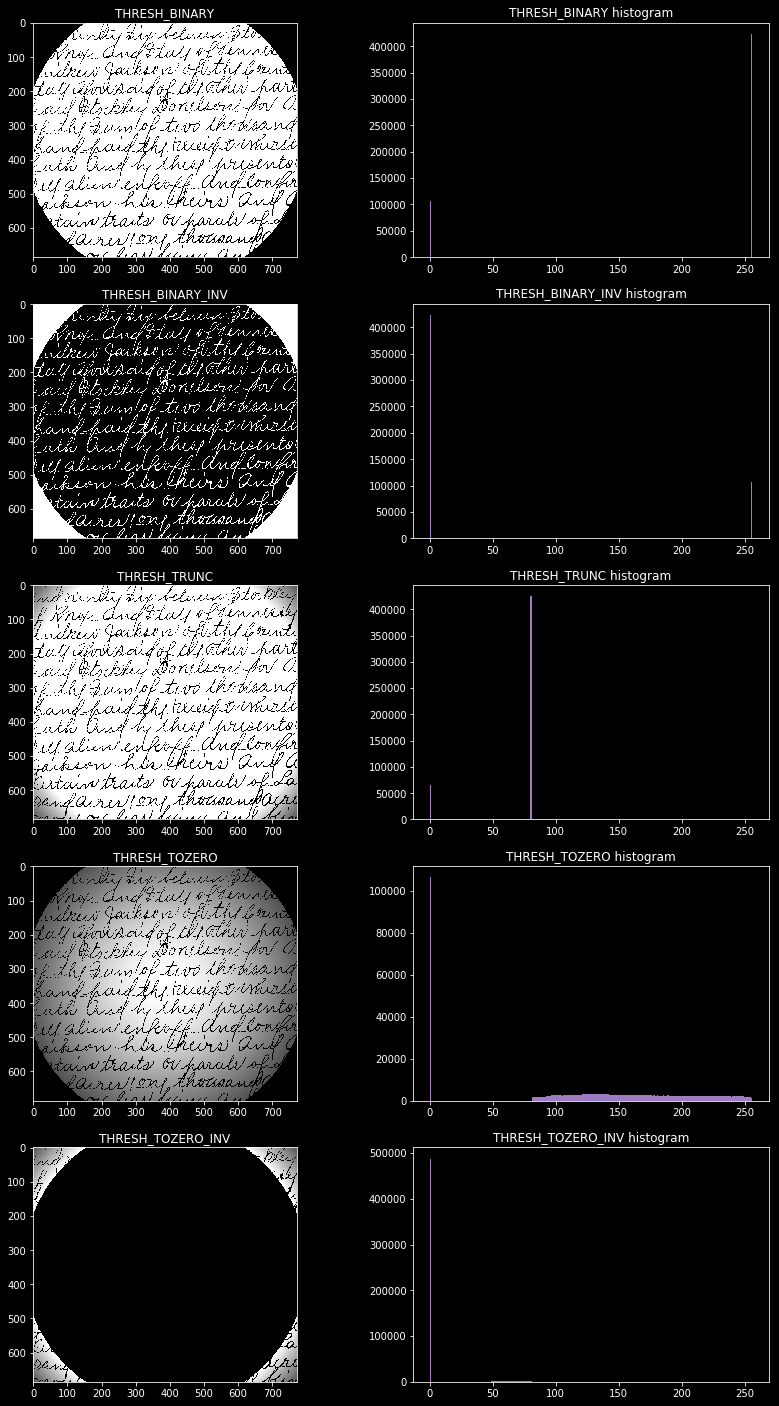

In [9]:
plt.style.use('dark_background')
f, axarr = plt.subplots(5, 2, figsize=(14, 25))
for index, (type_, name) in enumerate(zip(THRESH_TYPES, THRESH_NAMES)):
    ret, image_thresh = cv2.threshold(image, THRESHOLD, 255, type_)
    axarr[index, 0].imshow(image_thresh, 'gray')
    axarr[index, 0].set_title(name)
    axarr[index, 1].hist(image_thresh.ravel(), 256, [0,256], color = '#9E7CC1')
    axarr[index, 1].set_title("{} histogram".format(name))

## Otsu’s Binarization

In [5]:
ret,th = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Threshold value: {}".format(ret))

Threshold value: 124.0


### Display the Otsu’s Binarization histogram

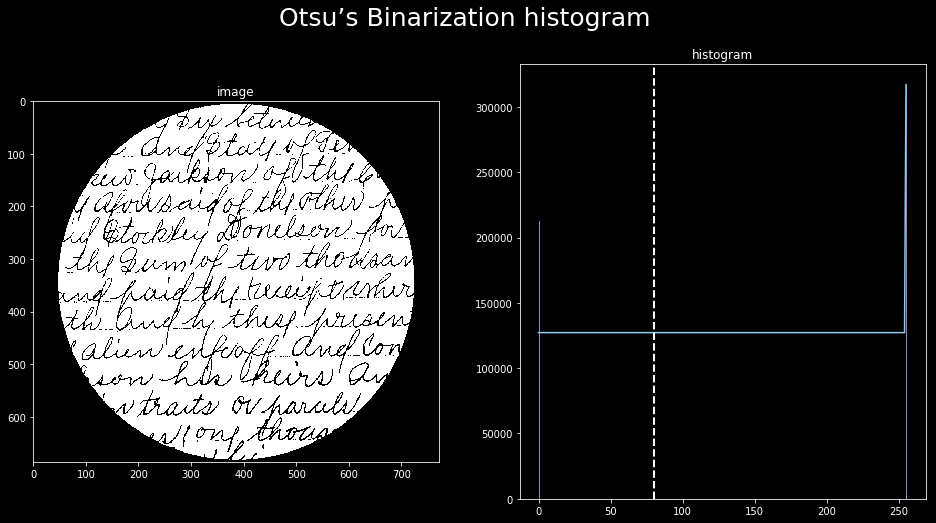

In [10]:
# creation of a cumulative histogram
hist,bins = np.histogram(th.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Otsu’s Binarization histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(th, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(th.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.axvline(x=ret, color="#FFFFFF", linestyle='dashed', linewidth=2)
ax2.set_title("histogram")

plt.show()

## Moving average binarization

### Settings

In [12]:
N = 20
a = 0.5

### Implementation

In [17]:
queue = np.zeros(N)
i = 1
mean = 20

In [22]:
output_image = np.copy(image)
X, Y = image.shape

for x in tqdm(range(X)): # 0 -> WIDTH
    for y in range(Y):   # 0 -> HEIGHT
        i_last = i % 20
        mean = mean + (queue[i] - queue[i_last]) / N
        i = i % 20
        T = a * mean
        if image[x, y] > T:
            output_image[x, y] = 255
        else:
            output_image[x, y] = 0

100%|██████████| 686/686 [00:01<00:00, 406.16it/s]


Text(0.5, 1.0, 'histogram')

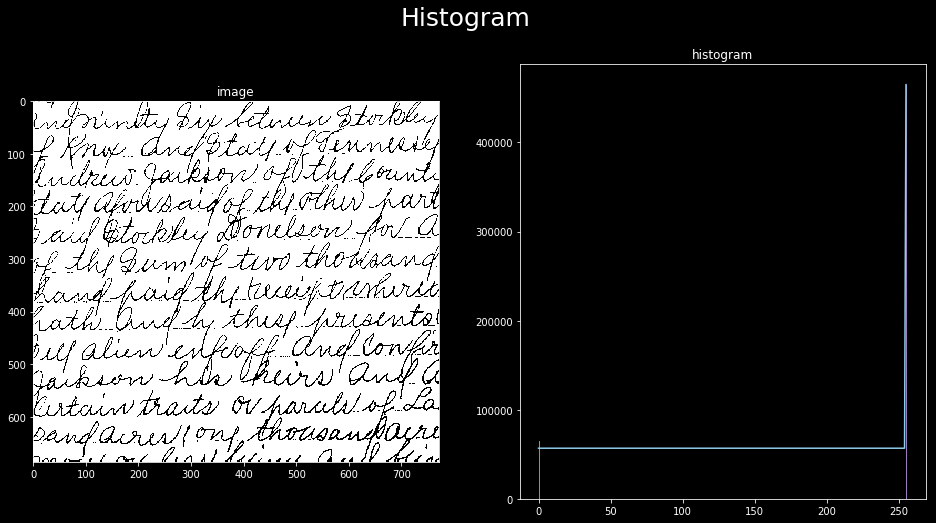

In [24]:
# creation of a cumulative histogram
hist,bins = np.histogram(output_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(output_image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(output_image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.set_title("histogram")
